In [5]:
from datasets import load_dataset

In [2]:
mnli = load_dataset("glue", "mnli")

Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'mnli' at /home/mtheologitis/.cache/huggingface/datasets/glue/mnli/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Thu Jul 25 14:20:10 2024).


In [38]:
mnli['train'].features

{'premise': Value(dtype='string', id=None),
 'hypothesis': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'neutral', 'contradiction'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [39]:
mnli['train'].num_rows

392702

In [20]:
qqp = load_dataset("glue", "qqp")

In [40]:
qqp['train'].features

{'question1': Value(dtype='string', id=None),
 'question2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_duplicate', 'duplicate'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [41]:
qqp['train'].num_rows

363846

In [3]:
363846 / (1000 * 8)

45.48075

In [21]:
qnli = load_dataset("glue", "qnli")

In [42]:
qnli['train'].features

{'question': Value(dtype='string', id=None),
 'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'not_entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [43]:
qnli['train'].num_rows

104743

In [4]:
104743 / (250 * 8)

52.3715

In [6]:
sst2 = load_dataset("glue", "sst2")

Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'sst2' at /home/mtheologitis/.cache/huggingface/datasets/glue/sst2/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Thu Jul 25 13:59:21 2024).


In [7]:
sst2['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [45]:
sst2['train'].num_rows

67349

In [5]:
67349 / (100 * 8)

84.18625

In [23]:
cola = load_dataset("glue", "cola")

In [46]:
cola['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['unacceptable', 'acceptable'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [47]:
cola['train'].num_rows

8551

In [10]:
8551 / (50 * 8)

21.3775

In [3]:
stsb = load_dataset("glue", "stsb")

Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'stsb' at /home/mtheologitis/.cache/huggingface/datasets/glue/stsb/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Tue Dec 17 11:36:27 2024).


In [5]:
stsb['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': Value(dtype='float32', id=None),
 'idx': Value(dtype='int32', id=None)}

In [6]:
stsb['train'].num_rows

5749

In [6]:
mrpc = load_dataset("glue", "mrpc")

Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'mrpc' at /home/mtheologitis/.cache/huggingface/datasets/glue/mrpc/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Tue Dec 17 12:39:27 2024).


In [7]:
mrpc['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [8]:
mrpc['train'].num_rows

3668

In [9]:
mrpc['train'].features['label'].num_classes

2

In [11]:
mrpc['validation']

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 408
})

In [12]:
# Get the label distribution in the validation split
label_distribution = mrpc['validation'].features['label'].names
label_counts = mrpc['validation'].to_pandas()['label'].value_counts()

# Combine labels and counts into a readable dictionary
label_distribution_dict = {label_distribution[label]: count for label, count in label_counts.items()}
print(label_distribution_dict)

{'equivalent': 279, 'not_equivalent': 129}


In [14]:
label_distribution_dict['not_equivalent'] / (label_distribution_dict['equivalent'] + label_distribution_dict['not_equivalent'])

0.3161764705882353

In [26]:
rte = load_dataset("glue", "rte")

In [37]:
rte['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'not_entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [52]:
rte

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [34]:
rte['train'].num_rows

2490

In [60]:
2490 / (10 * 8)

31.125

# Visualize Label/Quantity Distributions

## Funcs

In [150]:
from datasets import load_dataset
import numpy as np
import random

def calculate_prior_distribution(raw_train_dataset):
    """
    Calculate the prior distribution of labels in the training dataset.

    This function calculates the proportion of each label in the training dataset,
    which is used as the prior distribution for Dirichlet sampling.

    Args:
        raw_train_dataset (datasets.arrow_dataset.Dataset): The training dataset.

    Returns:
        tuple: A tuple containing:
            - prior_distribution (numpy.ndarray): An array of label proportions.
            - num_labels (int): The number of unique labels in the dataset.
    """

    # Calculate the number of samples for each label
    label_count_dict = dict(raw_train_dataset.to_pandas()['label'].value_counts())
    # Num. of samples
    n = len(raw_train_dataset)
    # (label, count) list, sorted with label increasing
    label_count_tuple = sorted(label_count_dict.items(), key=lambda x: x[0])
    # prior distribution
    prior_distribution = np.array([c / n for _, c in label_count_tuple])

    # number of labels
    num_labels = len(label_count_dict)

    return prior_distribution, num_labels


def sample_to_client(client_sample_counts, sample_label):
    """
    Assign a sample to a client based on the sample's label and the remaining counts for each client.

    This function assigns a sample to the client that still needs more samples of the given label.
    It decrements the count for that label for the chosen client. If no client has a remaining count
    of at least 1 for the label, the function assigns the sample to the client with the largest leftover count
    for that label.

    Args:
        client_sample_counts (numpy.ndarray): A 2D array where each row corresponds to a client and each column corresponds
            to the count (float) of samples needed for each label. The element at (i, j) represents the decimal number of
            samples of label j that client i still needs.
        sample_label (int): The label of the sample to be assigned to a client.

    Returns:
        int: The index of the client to which the sample has been assigned.
    """
    num_clients = len(client_sample_counts)
    client_indices = np.random.permutation(num_clients)

    for client_idx in client_indices:
        client_sample_count = client_sample_counts[client_idx]

        if client_sample_count[sample_label] >= 1:
            client_sample_count[sample_label] -= 1

            return client_idx

    # if all client data counts are less than 1, then assign the sample to the largest leftover
    client_idx = np.argmax(client_sample_counts[:, sample_label])
    client_sample_counts[client_idx][sample_label] -= 1

    return client_idx


def federated_dirichlet_datasets(raw_train_dataset, prior_distribution, num_clients, alpha):
    """
    Create federated datasets using Dirichlet-distributed label partitions.

    This function partitions the training dataset into multiple subsets, each corresponding
    to a client. The label distribution for each client is drawn from a Dirichlet distribution
    parameterized by the given prior distribution and concentration parameter alpha.
    The function also aims to keep the datasets as equal in size as possible.

    Args:
        raw_train_dataset (datasets.arrow_dataset.Dataset): The training dataset.
        prior_distribution (numpy.ndarray): An array representing the prior distribution of labels.
        num_clients (int): The number of clients.
        alpha (float): The concentration parameter for the Dirichlet distribution.

    Returns:
        list: A list of `datasets.arrow_dataset.Dataset` objects, each representing a client's dataset.
    """

    # Num. of samples
    n = len(raw_train_dataset)

    client_num_samples = n / num_clients

    # Draw label distributions for each client from Dirichlet distribution
    # Each i-th row represents the distribution of labels for the i-th client
    client_distributions = np.random.dirichlet(alpha * prior_distribution, num_clients)

    # Initialize client data indices
    client_sample_indices = [[] for i in range(num_clients)]

    # Calculate the number of samples per label each client should have
    # client_sample_counts[i] is an array of `num_label` elements
    # -- the counts for each label for the i-th client.
    client_sample_counts = np.array([
        client_distributions[client_idx, :] * client_num_samples
        for client_idx in range(num_clients)
    ])

    for sample_idx, sample in enumerate(raw_train_dataset):
        client_idx = sample_to_client(client_sample_counts, sample['label'])

        client_sample_indices[client_idx].append(sample_idx)

    # Create a Dataset for each client
    client_datasets = []
    for client_indices in client_sample_indices:
        client_dataset = raw_train_dataset.select(client_indices)
        client_datasets.append(client_dataset)

    return client_datasets

In [151]:
def get_label_distribution(dataset):
    label_distr = dataset.features['label'].names
    label_counts = dataset.to_pandas()['label'].value_counts()
    
    label_distr_dict = {label_distr[label]: count for label, count in label_counts.items()}
    return label_distr_dict

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams['font.size'] = 14.0
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'

## SST2

In [184]:
num_clients = 100
alpha = 1.0
name = 'sst2'

np.random.seed(42)
random.seed(42)

# Load the raw dataset
raw_datasets = load_dataset(path='glue', name=name)

# 2. Training dataset
raw_train_dataset = raw_datasets['train']

# Calculate the prior distribution
prior_distribution, num_labels = calculate_prior_distribution(raw_train_dataset)

# Partition the dataset into federated datasets
client_datasets = federated_dirichlet_datasets(raw_train_dataset, prior_distribution, num_clients, alpha)

client_label_distr = [
    get_label_distribution(client_datasets[i]) for i in range(num_clients)
]

# Convert data to a DataFrame for easier manipulation
df = pd.DataFrame(client_label_distr)
df = df.fillna(0)


Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'sst2' at /home/mtheologitis/.cache/huggingface/datasets/glue/sst2/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Sat Jan  4 11:03:09 2025).


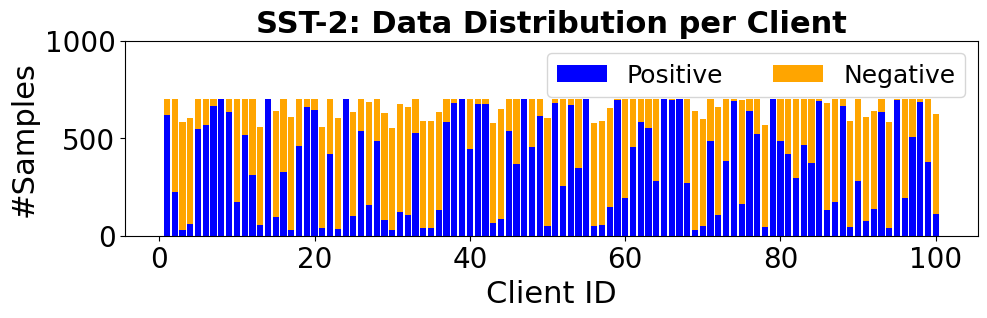

In [185]:

# Save to PDF
pdf = PdfPages(f'plots/SST2_distribution.pdf')

# Create a stacked bar chart for the label distribution across clients
fig, ax = plt.subplots(figsize=(11, 3))
x = range(1, len(df)+1)
ax.bar(x, df['positive'], label='Positive', color='blue')
ax.bar(x, df['negative'], bottom=df['positive'], label='Negative', color='orange')

# Add labels and title
ax.set_title('SST-2: Data Distribution per Client')
ax.set_xlabel('Client ID')
ax.set_ylabel('#Samples')
ax.legend()
ax.set_ylim(0, 1000)

#ax.set_xlim(0.5, len(df) + 0.5)  # Adjust x-axis to start with 1 but leave space on the left
legend = ax.legend(ncol=2)

# Apply tight layout BEFORE saving
#plt.tight_layout()

plt.subplots_adjust(top=0.88, bottom=0.23)  # Adjust these values as needed

pdf.savefig(plt.gcf()) # Save the current figure
# Display the plot
plt.show()
plt.close()
pdf.close()

## CoLA

In [181]:
num_clients = 50
alpha = 1.0
name = 'cola'

In [182]:
np.random.seed(42)
random.seed(42)

# Load the raw dataset
raw_datasets = load_dataset(path='glue', name=name)

# 2. Training dataset
raw_train_dataset = raw_datasets['train']

# Calculate the prior distribution
prior_distribution, num_labels = calculate_prior_distribution(raw_train_dataset)

# Partition the dataset into federated datasets
client_datasets = federated_dirichlet_datasets(raw_train_dataset, prior_distribution, num_clients, alpha)

client_label_distr = [
    get_label_distribution(client_datasets[i]) for i in range(num_clients)
]

# Convert data to a DataFrame for easier manipulation
df = pd.DataFrame(client_label_distr)
df = df.fillna(0)

Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'cola' at /home/mtheologitis/.cache/huggingface/datasets/glue/cola/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Sun Dec 22 06:35:52 2024).


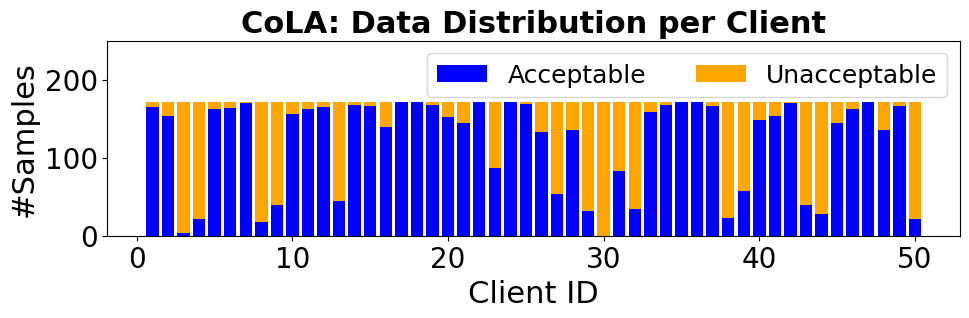

In [183]:
# Save to PDF
pdf = PdfPages(f'plots/CoLA_distribution.pdf')

# Create a stacked bar chart for the label distribution across clients
fig, ax = plt.subplots(figsize=(11, 3))
x = range(1, len(df)+1)
ax.bar(x, df['acceptable'], label='Acceptable', color='blue')
ax.bar(x, df['unacceptable'], bottom=df['acceptable'], label='Unacceptable', color='orange')

# Add labels and title
ax.set_title('CoLA: Data Distribution per Client')
ax.set_xlabel('Client ID')
ax.set_ylabel('#Samples')
ax.legend()
ax.set_ylim(0, 250)

plt.subplots_adjust(top=0.88, bottom=0.23)  # Adjust these values as needed

legend = ax.legend(ncol=2)

pdf.savefig(plt.gcf()) # Save the current figure
# Display the plot
plt.show()
plt.close()
pdf.close()

In [35]:
num_clients = 10
alpha = 1.0
name = 'rte'

In [36]:
np.random.seed(42)
random.seed(42)

# Load the raw dataset
raw_datasets = load_dataset(path='glue', name=name)

# 2. Training dataset
raw_train_dataset = raw_datasets['train']

# Calculate the prior distribution
prior_distribution, num_labels = calculate_prior_distribution(raw_train_dataset)

# Partition the dataset into federated datasets
client_datasets = federated_dirichlet_datasets(raw_train_dataset, prior_distribution, num_clients, alpha)

client_label_distr = [
    get_label_distribution(client_datasets[i]) for i in range(num_clients)
]

# Convert data to a DataFrame for easier manipulation
df = pd.DataFrame(client_label_distr)
df = df.fillna(0)

Using the latest cached version of the dataset since glue couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'rte' at /home/mtheologitis/.cache/huggingface/datasets/glue/rte/0.0.0/bcdcba79d07bc864c1c254ccfcedcce55bcc9a8c (last modified on Tue Dec 17 13:19:19 2024).


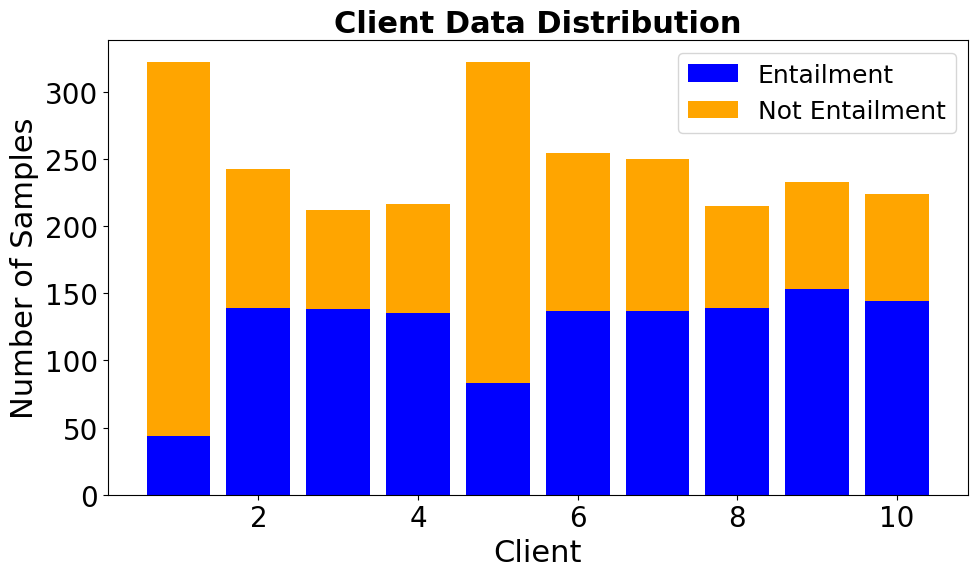

In [37]:
# Create a stacked bar chart for the label distribution across clients
fig, ax = plt.subplots(figsize=(10, 6))
x = range(1, len(df)+1)
ax.bar(x, df['entailment'], label='Entailment', color='blue')
ax.bar(x, df['not_entailment'], bottom=df['entailment'], label='Not Entailment', color='orange')

# Add labels and title
ax.set_title('Client Data Distribution')
ax.set_xlabel('Client')
ax.set_ylabel('Number of Samples')
ax.legend()
#ax.set_ylim(0, 220)

# Display the plot
plt.tight_layout()
plt.show()